In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt

from rl_algorithms.tabular_td_zero import TabularTdZero

In [24]:
# Set environment
env = gym.make('FrozenLake-v0')
NUM_TRIAL = 10000

# Set algorithm
tabular_td_zero = TabularTdZero(env.observation_space, env.action_space, discount_rate=0.99)

# Estimate value function
for n_trial in range(NUM_TRIAL):
    env.reset()
    observation = None
    while True:
        action = env.action_space.sample()  # uniformly randomly sample to estimate value function
        next_observation, reward, done, _ = env.step(action)
        if observation is not None:
            tabular_td_zero.update(observation, reward, next_observation)
        observation = next_observation
        if done:
            break

[2016-12-21 15:33:08,077] Making new env: FrozenLake-v0


In [25]:
values = tabular_td_zero.values.reshape((4, 4))
normalized_values = values / values.max()

In [26]:
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print(normalized_values)

[[ 0.025  0.027  0.048  0.023]
 [ 0.029  0.000  0.099  0.000]
 [ 0.058  0.143  0.279  0.000]
 [ 0.000  0.262  1.000  0.000]]


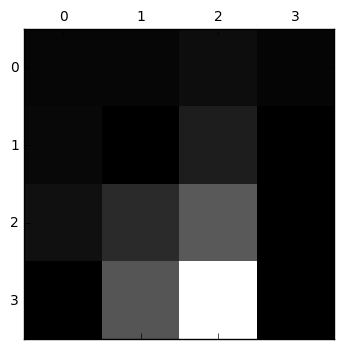

In [27]:
plt.figure()
plt.matshow(normalized_values, cmap=plt.cm.Greys_r)
plt.show()